In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data_main = pd.read_csv("sample_submission.csv")
test_main = pd.read_csv("test.csv")
train_main = pd.read_csv("train[1].csv")

In [23]:
train_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        165034 non-null  int64  
 1   CustomerId                165034 non-null  int64  
 2   Surname                   165034 non-null  object 
 3   CreditScore               165034 non-null  int64  
 4   Geography                 165034 non-null  object 
 5   Gender                    165034 non-null  object 
 6   Age                       165034 non-null  float64
 7   Tenure                    165034 non-null  int64  
 8   Balance                   165034 non-null  float64
 9   NumOfProducts             165034 non-null  int64  
 10  HasCrCard                 165034 non-null  float64
 11  IsActiveMember            165034 non-null  float64
 12  EstimatedSalary           165034 non-null  float64
 13  Exited                    165034 non-null  i

In [5]:
df = train_main
df['Age_to_NumOfProducts'] = df['Age'] / df['NumOfProducts']
df['Balance_Tenure'] = df['Balance'] * df['Tenure']
df['Age_NumOfProducts'] = df['Age'] * df['NumOfProducts']
df['Balance_to_CreditScore'] = df['Balance'] / df['CreditScore']
df['Balance_to_NumOfProducts'] = df['Balance'] / df['NumOfProducts']
df['Balance_to_Salary'] = df['Balance'] / df['EstimatedSalary']
df['Tenure_to_Age'] = df['Tenure'] / df['Age']
df['CreditScore_to_Age'] = df['CreditScore'] / df['Age']
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['CreditScore_IsActive'] = df['CreditScore'] * df['IsActiveMember']

df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Age_to_NumOfProducts,Balance_Tenure,Age_NumOfProducts,Balance_to_CreditScore,Balance_to_NumOfProducts,Balance_to_Salary,Tenure_to_Age,CreditScore_to_Age,Balance_NumOfProducts,CreditScore_IsActive
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,...,16.5,0.00,66.0,0.000000,0.00,0.000000,0.090909,20.242424,0.00,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,...,16.5,0.00,66.0,0.000000,0.00,0.000000,0.030303,19.000000,0.00,627.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,...,20.0,0.00,80.0,0.000000,0.00,0.000000,0.250000,16.950000,0.00,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,...,34.0,297765.08,34.0,256.252220,148882.54,1.760655,0.058824,17.088235,148882.54,581.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,...,16.5,0.00,66.0,0.000000,0.00,0.000000,0.151515,21.696970,0.00,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,...,33.0,0.00,33.0,0.000000,0.00,0.000000,0.060606,20.212121,0.00,667.0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,...,35.0,0.00,35.0,0.000000,0.00,0.000000,0.085714,22.628571,0.00,0.0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,...,31.0,0.00,31.0,0.000000,0.00,0.000000,0.161290,18.225806,0.00,565.0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,...,30.0,1130731.00,30.0,291.575812,161533.00,2.269582,0.233333,18.466667,161533.00,554.0


## ENCODING

In [14]:
cols = ['id',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Age_to_NumOfProducts',
 'Balance_Tenure',
 'Age_NumOfProducts',
 'Balance_to_CreditScore',
 'Balance_to_NumOfProducts',
 'Balance_to_Salary',
 'Tenure_to_Age',
 'CreditScore_to_Age',
 'Balance_NumOfProducts',
 'CreditScore_IsActive']
data = df[cols]
data_encod = pd.DataFrame(data)

le = LabelEncoder()

for column in data_encod.select_dtypes(include=['object']).columns:
    data_encod[column] = le.fit_transform(data_encod[column])
data_encod

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Age_to_NumOfProducts,Balance_Tenure,Age_NumOfProducts,Balance_to_CreditScore,Balance_to_NumOfProducts,Balance_to_Salary,Tenure_to_Age,CreditScore_to_Age,Balance_NumOfProducts,CreditScore_IsActive
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,...,16.5,0.00,66.0,0.000000,0.00,0.000000,0.090909,20.242424,0.00,0.0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,...,16.5,0.00,66.0,0.000000,0.00,0.000000,0.030303,19.000000,0.00,627.0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,...,20.0,0.00,80.0,0.000000,0.00,0.000000,0.250000,16.950000,0.00,0.0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,...,34.0,297765.08,34.0,256.252220,148882.54,1.760655,0.058824,17.088235,148882.54,581.0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,...,16.5,0.00,66.0,0.000000,0.00,0.000000,0.151515,21.696970,0.00,716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,1701,667,2,0,33.0,2,0.00,1,...,33.0,0.00,33.0,0.000000,0.00,0.000000,0.060606,20.212121,0.00,667.0
165030,165030,15665521,1918,792,0,1,35.0,3,0.00,1,...,35.0,0.00,35.0,0.000000,0.00,0.000000,0.085714,22.628571,0.00,0.0
165031,165031,15664752,1172,565,0,1,31.0,5,0.00,1,...,31.0,0.00,31.0,0.000000,0.00,0.000000,0.161290,18.225806,0.00,565.0
165032,165032,15689614,1176,554,2,0,30.0,7,161533.00,1,...,30.0,1130731.00,30.0,291.575812,161533.00,2.269582,0.233333,18.466667,161533.00,554.0


## POINT-BISERIAL CORRELATION

Exited va id o'rtasidagi point-biserial korrelyatsiya: 0.0025 (p-value: 0.3075)
Exited va CustomerId o'rtasidagi point-biserial korrelyatsiya: -0.0099 (p-value: 0.0001)
Exited va Surname o'rtasidagi point-biserial korrelyatsiya: -0.0283 (p-value: 0.0000)
Exited va CreditScore o'rtasidagi point-biserial korrelyatsiya: -0.0274 (p-value: 0.0000)
Exited va Geography o'rtasidagi point-biserial korrelyatsiya: 0.0533 (p-value: 0.0000)
Exited va Gender o'rtasidagi point-biserial korrelyatsiya: -0.1464 (p-value: 0.0000)
Exited va Age o'rtasidagi point-biserial korrelyatsiya: 0.3408 (p-value: 0.0000)
Exited va Tenure o'rtasidagi point-biserial korrelyatsiya: -0.0196 (p-value: 0.0000)
Exited va Balance o'rtasidagi point-biserial korrelyatsiya: 0.1297 (p-value: 0.0000)
Exited va NumOfProducts o'rtasidagi point-biserial korrelyatsiya: -0.2146 (p-value: 0.0000)
Exited va HasCrCard o'rtasidagi point-biserial korrelyatsiya: -0.0221 (p-value: 0.0000)
Exited va IsActiveMember o'rtasidagi point-biserial 

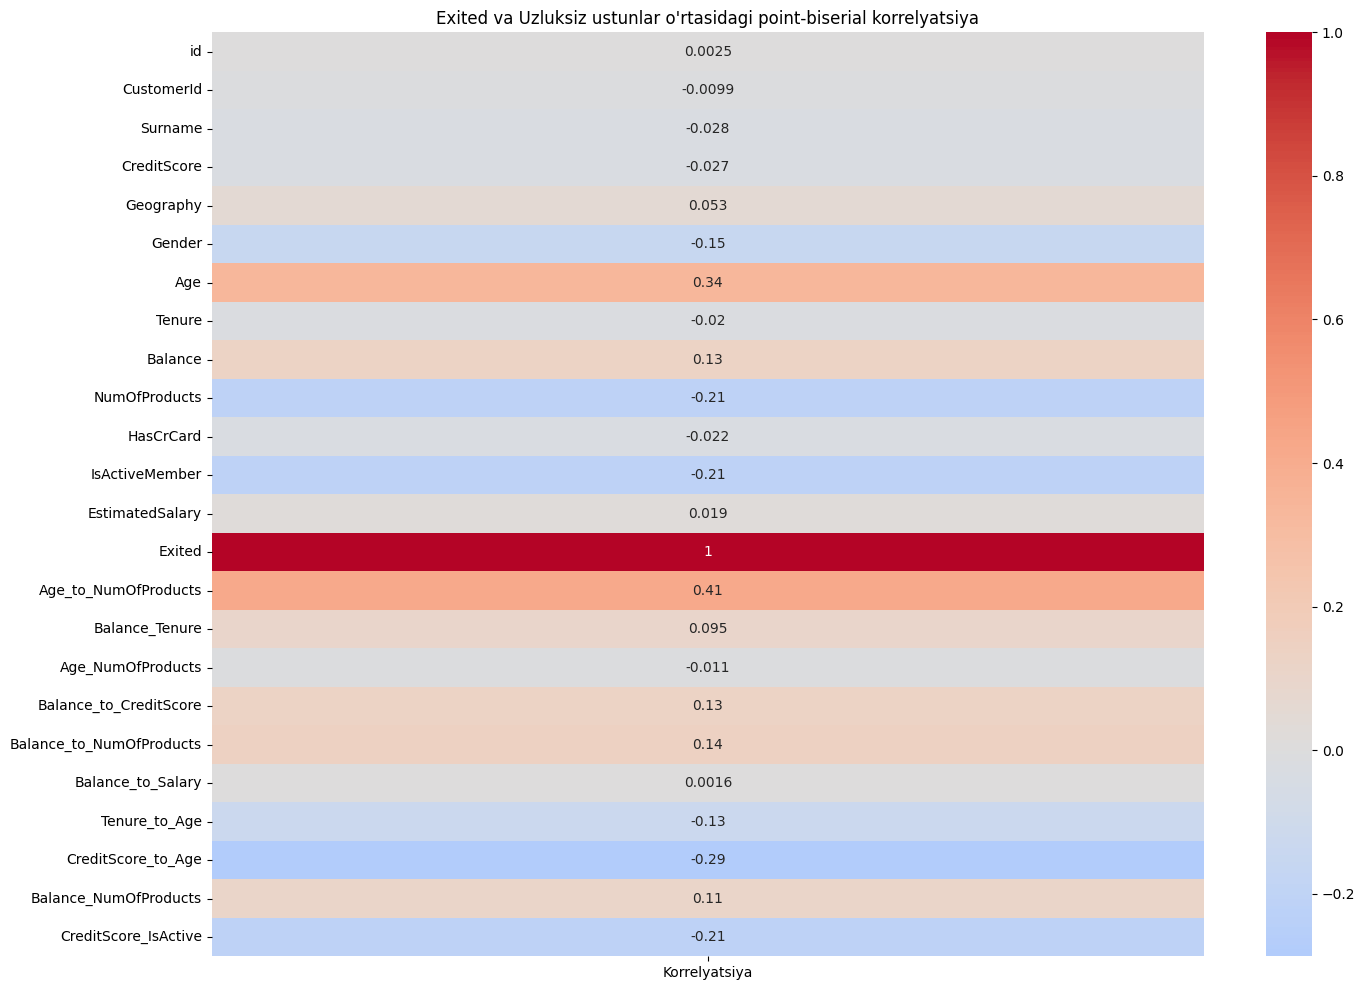

In [17]:

# Binar va uzluksiz ustunlarni aniqlash
binar_ustunlar = data_encod['Exited']  # faqat Exited ustuni ishlatiladi
uzluksiz_ustunlar = data_encod[cols]  # Uzluksiz ustunlar

# Point-biserial korrelyatsiyalarni saqlash uchun lug'at yaratish
korrelyatsiya_natijalari = {}

# Korrelyatsiyani hisoblash
for uzluksiz_ustun in uzluksiz_ustunlar.columns:
    korrelyatsiya, p_value = pointbiserialr(binar_ustunlar, uzluksiz_ustunlar[uzluksiz_ustun])
    korrelyatsiya_natijalari[uzluksiz_ustun] = korrelyatsiya
    print(f"Exited va {uzluksiz_ustun} o'rtasidagi point-biserial korrelyatsiya: {korrelyatsiya:.4f} (p-value: {p_value:.4f})")

# Korrelyatsiya natijalarini DataFrame'ga o'tkazish
korrelyatsiya_df = pd.DataFrame.from_dict(korrelyatsiya_natijalari, orient='index', columns=['Korrelyatsiya'])

# Heatmap'ni chizish
plt.figure(figsize=(16, 12))
sns.heatmap(korrelyatsiya_df, annot=True, cmap='coolwarm', center=0)
plt.title('Exited va Uzluksiz ustunlar o\'rtasidagi point-biserial korrelyatsiya')
plt.show()


# PHI CORRELATION

Exited va id o'rtasidagi Phi korrelyatsiya: 1.0000 (p-value: 0.4988)
Exited va CustomerId o'rtasidagi Phi korrelyatsiya: 0.3789 (p-value: 0.0150)
Exited va Surname o'rtasidagi Phi korrelyatsiya: 0.2299 (p-value: 0.0000)
Exited va CreditScore o'rtasidagi Phi korrelyatsiya: 0.0968 (p-value: 0.0000)
Exited va Geography o'rtasidagi Phi korrelyatsiya: 0.2112 (p-value: 0.0000)
Exited va Gender o'rtasidagi Phi korrelyatsiya: 0.1464 (p-value: 0.0000)
Exited va Age o'rtasidagi Phi korrelyatsiya: 0.4276 (p-value: 0.0000)
Exited va Tenure o'rtasidagi Phi korrelyatsiya: 0.0401 (p-value: 0.0000)
Exited va Balance o'rtasidagi Phi korrelyatsiya: 0.4904 (p-value: 0.0000)
Exited va NumOfProducts o'rtasidagi Phi korrelyatsiya: 0.4201 (p-value: 0.0000)
Exited va HasCrCard o'rtasidagi Phi korrelyatsiya: 0.0221 (p-value: 0.0000)
Exited va IsActiveMember o'rtasidagi Phi korrelyatsiya: 0.2102 (p-value: 0.0000)
Exited va EstimatedSalary o'rtasidagi Phi korrelyatsiya: 0.5881 (p-value: 0.0000)
Exited va Exited 

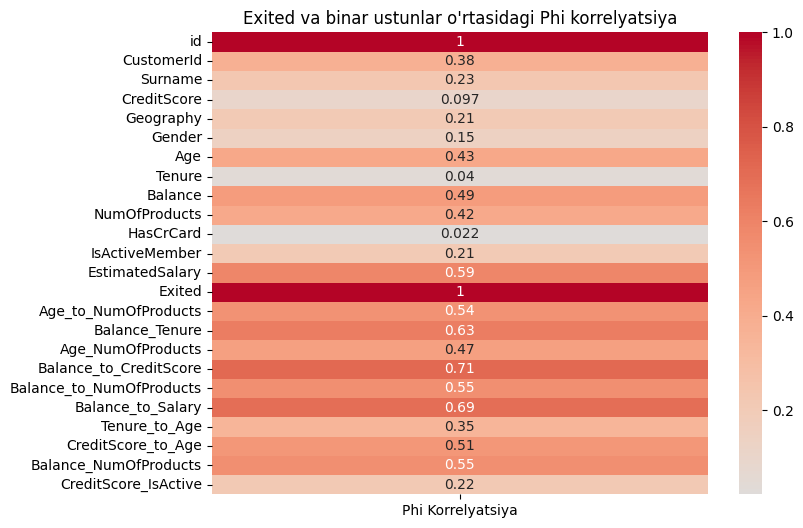

In [18]:

binar_ustunlar = data_encod[cols]  # Exited bilan bog'liq binar ustunlar
target_ustun = data_encod['Exited']  # Target binar ustun

# Phi korrelyatsiyalarni saqlash uchun lug'at yaratish
phi_korrelyatsiya_natijalari = {}

# Phi korrelyatsiyani hisoblash
for binar_ustun in binar_ustunlar.columns:
    # Chi-square kontingentsiya jadvalini yaratish
    contingency_table = pd.crosstab(target_ustun, binar_ustunlar[binar_ustun])

    # Chi2 statistikasi va Phi korrelyatsiyani hisoblash
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Phi korrelyatsiya formula: sqrt(chi2/n)
    n = contingency_table.sum().sum()  # umumiy kuzatuvlar soni
    phi_korrelyatsiya = np.sqrt(chi2 / n)

    phi_korrelyatsiya_natijalari[binar_ustun] = phi_korrelyatsiya
    print(f"Exited va {binar_ustun} o'rtasidagi Phi korrelyatsiya: {phi_korrelyatsiya:.4f} (p-value: {p_value:.4f})")

# Phi korrelyatsiya natijalarini DataFrame'ga o'tkazish
phi_korrelyatsiya_df = pd.DataFrame.from_dict(phi_korrelyatsiya_natijalari, orient='index', columns=['Phi Korrelyatsiya'])

# Heatmap'ni chizish
plt.figure(figsize=(8, 6))
sns.heatmap(phi_korrelyatsiya_df, annot=True, cmap='coolwarm', center=0)
plt.title('Exited va binar ustunlar o\'rtasidagi Phi korrelyatsiya')
plt.show()


# CRAMER'S V CORRELATION

Exited va id o'rtasidagi Cramér's V: 1.0000 (p-value: 0.4988)
Exited va CustomerId o'rtasidagi Cramér's V: 0.3789 (p-value: 0.0150)
Exited va Surname o'rtasidagi Cramér's V: 0.2299 (p-value: 0.0000)
Exited va CreditScore o'rtasidagi Cramér's V: 0.0968 (p-value: 0.0000)
Exited va Geography o'rtasidagi Cramér's V: 0.2112 (p-value: 0.0000)
Exited va Gender o'rtasidagi Cramér's V: 0.1464 (p-value: 0.0000)
Exited va Age o'rtasidagi Cramér's V: 0.4276 (p-value: 0.0000)
Exited va Tenure o'rtasidagi Cramér's V: 0.0401 (p-value: 0.0000)
Exited va Balance o'rtasidagi Cramér's V: 0.4904 (p-value: 0.0000)
Exited va NumOfProducts o'rtasidagi Cramér's V: 0.4201 (p-value: 0.0000)
Exited va HasCrCard o'rtasidagi Cramér's V: 0.0221 (p-value: 0.0000)
Exited va IsActiveMember o'rtasidagi Cramér's V: 0.2102 (p-value: 0.0000)
Exited va EstimatedSalary o'rtasidagi Cramér's V: 0.5881 (p-value: 0.0000)
Exited va Exited o'rtasidagi Cramér's V: 1.0000 (p-value: 0.0000)
Exited va Age_to_NumOfProducts o'rtasidagi

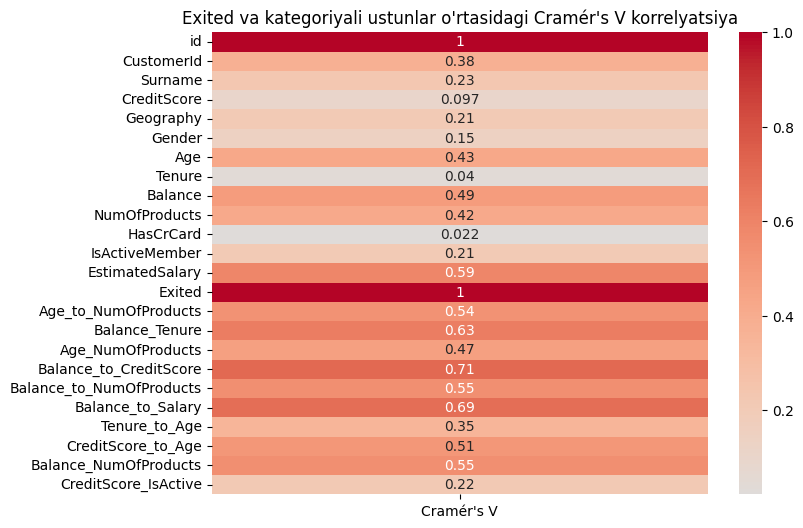

In [19]:


# Cramér's V ni hisoblash funksiyasi
def cramers_v(chi2, n, k1, k2):
    return np.sqrt(chi2 / (n * (min(k1 - 1, k2 - 1))))

# Binar va uzluksiz emas, lekin kategoriyali o'zgaruvchilarni aniqlash
binar_ustunlar = data_encod[cols]  # Kategoriyali ustunlar
target_ustun = data_encod['Exited']  # Target ustun

# Cramér's V korrelyatsiyalarni saqlash uchun lug'at yaratish
cramers_v_natijalari = {}

# Cramér's V ni hisoblash
for binar_ustun in binar_ustunlar.columns:
    # Chi-square kontingentsiya jadvalini yaratish
    contingency_table = pd.crosstab(target_ustun, binar_ustunlar[binar_ustun])

    # Chi2 statistikasi va p-qiymatni hisoblash
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Kuzatuvlar soni
    n = contingency_table.sum().sum()  # umumiy kuzatuvlar soni

    # Jadvaldagi kategoriyalar soni (chiqishlar soni)
    k1, k2 = contingency_table.shape

    # Cramér's V ni hisoblash
    cramers_v_score = cramers_v(chi2, n, k1, k2)

    cramers_v_natijalari[binar_ustun] = cramers_v_score
    print(f"Exited va {binar_ustun} o'rtasidagi Cramér's V: {cramers_v_score:.4f} (p-value: {p_value:.4f})")

# Cramér's V natijalarini DataFrame'ga o'tkazish
cramers_v_df = pd.DataFrame.from_dict(cramers_v_natijalari, orient='index', columns=['Cramér\'s V'])

# Heatmap'ni chizish
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', center=0)
plt.title('Exited va kategoriyali ustunlar o\'rtasidagi Cramér\'s V korrelyatsiya')
plt.show()


# KENDAL TAU CORRELATION

Exited va id o'rtasidagi Kendall's Tau: 0.0021 (p-value: 0.3075)
Exited va CustomerId o'rtasidagi Kendall's Tau: -0.0080 (p-value: 0.0001)
Exited va Surname o'rtasidagi Kendall's Tau: -0.0253 (p-value: 0.0000)
Exited va CreditScore o'rtasidagi Kendall's Tau: -0.0238 (p-value: 0.0000)
Exited va Geography o'rtasidagi Kendall's Tau: 0.0768 (p-value: 0.0000)
Exited va Gender o'rtasidagi Kendall's Tau: -0.1464 (p-value: 0.0000)
Exited va Age o'rtasidagi Kendall's Tau: 0.2948 (p-value: 0.0000)
Exited va Tenure o'rtasidagi Kendall's Tau: -0.0166 (p-value: 0.0000)
Exited va Balance o'rtasidagi Kendall's Tau: 0.1127 (p-value: 0.0000)
Exited va NumOfProducts o'rtasidagi Kendall's Tau: -0.2642 (p-value: 0.0000)
Exited va HasCrCard o'rtasidagi Kendall's Tau: -0.0221 (p-value: 0.0000)
Exited va IsActiveMember o'rtasidagi Kendall's Tau: -0.2102 (p-value: 0.0000)
Exited va EstimatedSalary o'rtasidagi Kendall's Tau: 0.0163 (p-value: 0.0000)
Exited va Exited o'rtasidagi Kendall's Tau: 1.0000 (p-value: 

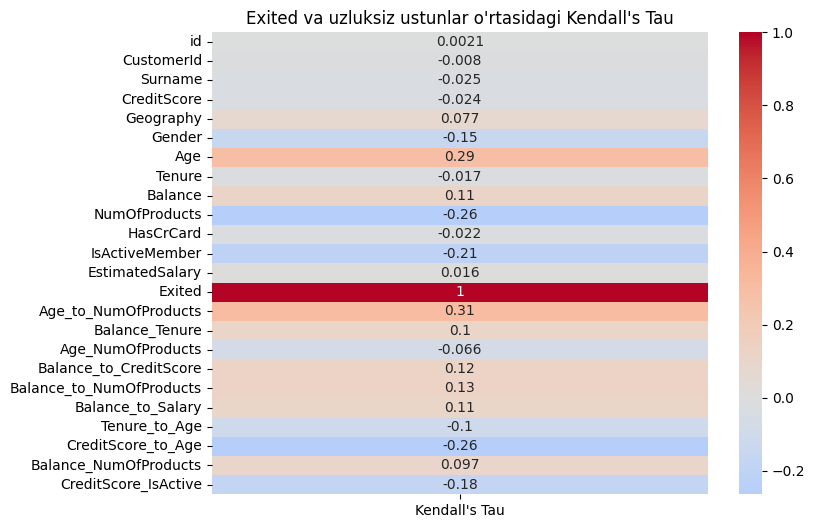

In [20]:
uzluksiz_ustunlar = data_encod[cols]  # Uzluksiz o'zgaruvchilar
target_ustun = data_encod['Exited']  # Target o'zgaruvchi (binar)

# Kendall's Tau natijalarini saqlash uchun lug'at yaratish
kendall_tau_natijalari = {}

# Kendall's Tau koeffitsientini hisoblash
for uzluksiz_ustun in uzluksiz_ustunlar.columns:
    tau, p_value = kendalltau(target_ustun, uzluksiz_ustunlar[uzluksiz_ustun])
    kendall_tau_natijalari[uzluksiz_ustun] = tau
    print(f"Exited va {uzluksiz_ustun} o'rtasidagi Kendall's Tau: {tau:.4f} (p-value: {p_value:.4f})")

# Kendall's Tau natijalarini DataFrame'ga o'tkazish
kendall_tau_df = pd.DataFrame.from_dict(kendall_tau_natijalari, orient='index', columns=['Kendall\'s Tau'])

# Heatmap'ni chizish
plt.figure(figsize=(8, 6))
sns.heatmap(kendall_tau_df, annot=True, cmap='coolwarm', center=0)
plt.title('Exited va uzluksiz ustunlar o\'rtasidagi Kendall\'s Tau')
plt.show()
